In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [3]:
fuel_type = []
for trans in fuel_econ.trans:
    fuel_type.append(trans.split()[0])
fuel_econ['trans_type'] = fuel_type   
fuel_econ['trans_type'].value_counts()

Automatic    3068
Manual        861
Name: trans_type, dtype: int64

In [4]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'] 

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

In [5]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

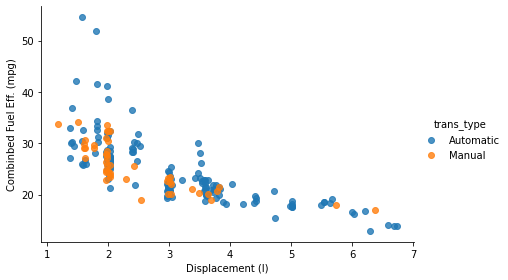

In [12]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'trans_type', hue_order = ['Automatic', 'Manual'], height = 4, aspect = 1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combinbed Fuel Eff. (mpg)');

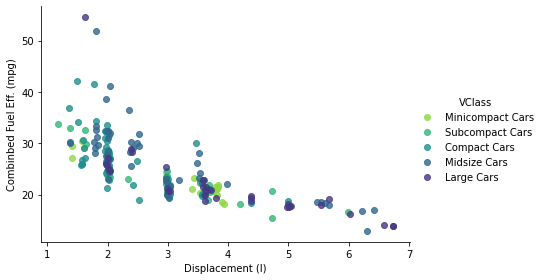

In [14]:
g = sb.FacetGrid(data = fuel_econ_subset, hue = 'VClass', height = 4, aspect = 1.5, palette = 'viridis_r')
g.map(sb.regplot, 'displ', 'comb', x_jitter = 0.04, fit_reg = False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combinbed Fuel Eff. (mpg)');

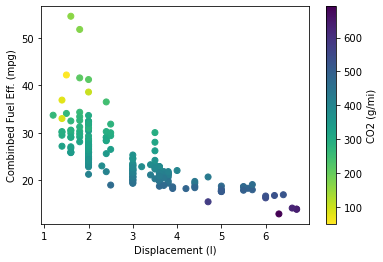

In [16]:
plt.scatter(data = fuel_econ_subset, x='displ', y='comb', c = 'co2', cmap = 'viridis_r')
plt.colorbar(label = 'CO2 (g/mi)')
plt.xlabel('Displacement (l)')
plt.ylabel('Combinbed Fuel Eff. (mpg)');